In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [2]:
df_bonosocial = pd.read_parquet('./data/tramita/exp_bonosocial_termico.parquet')

In [18]:
df_bonosocial.head()

,id_exp,cod_procedimiento,dni,nif,fecha_alta_exp,codine_provincia,codine_municipio,codine,municipio,provincia,unidad_tramitadora,denom_procedimiento,desc_procedimiento,siaci,consejeria_proc,org_instructor_proc,es_telematica
fecha_registro_exp,,,,,,,,,,,,,,,,,
2022-02-09,1126695,876,1787280,<NA>,2022-02-09 08:56:50,<NA>,<NA>,<NA>,<NA>,<NA>,Direccion general de economia circular y agend...,SLOJ - Ayudas Bono Social Térmico,Programa de ayudas para compensar los gastos t...,SLOJ,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,False
2022-02-09,1126718,876,1787288,<NA>,2022-02-09 08:57:02,<NA>,<NA>,<NA>,<NA>,<NA>,Direccion general de economia circular y agend...,SLOJ - Ayudas Bono Social Térmico,Programa de ayudas para compensar los gastos t...,SLOJ,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,False
2022-02-09,1126719,876,340694,<NA>,2022-02-09 08:57:02,<NA>,<NA>,<NA>,<NA>,<NA>,Direccion general de economia circular y agend...,SLOJ - Ayudas Bono Social Térmico,Programa de ayudas para compensar los gastos t...,SLOJ,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,False
2022-02-09,1126748,876,1787300,<NA>,2022-02-09 08:57:14,<NA>,<NA>,<NA>,<NA>,<NA>,Direccion general de economia circular y agend...,SLOJ - Ayudas Bono Social Térmico,Programa de ayudas para compensar los gastos t...,SLOJ,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,False
2022-02-09,1126751,876,1787303,<NA>,2022-02-09 08:57:17,<NA>,<NA>,<NA>,<NA>,<NA>,Direccion general de economia circular y agend...,SLOJ - Ayudas Bono Social Térmico,Programa de ayudas para compensar los gastos t...,SLOJ,Consejeria de desarrollo sostenible,Direccion general de transicion energetica,False


# Create time series

In [3]:
df_bonosocial.set_index('fecha_registro_exp', inplace=True)

In [4]:
ts_bonosocial = df_bonosocial.resample('D').agg(
    total_exp=('id_exp', 'count')
).fillna(0).reset_index()
ts_bonosocial.set_index('fecha_registro_exp', inplace=True)

In [5]:
ts_bonosocial.head()

,total_exp
fecha_registro_exp,
2022-02-04,1500
2022-02-05,0
2022-02-06,0
2022-02-07,23831
2022-02-08,4677


# White noise

In [6]:
ts_bonosocial.describe()

,total_exp
count,923.000000
mean,273.159263
std,3282.079248
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,61802.000000


In [7]:
wn = np.random.normal(loc = ts_bonosocial.total_exp.mean(), scale = ts_bonosocial.total_exp.std(), size = len(ts_bonosocial))

In [8]:
ts_bonosocial['wn'] = wn

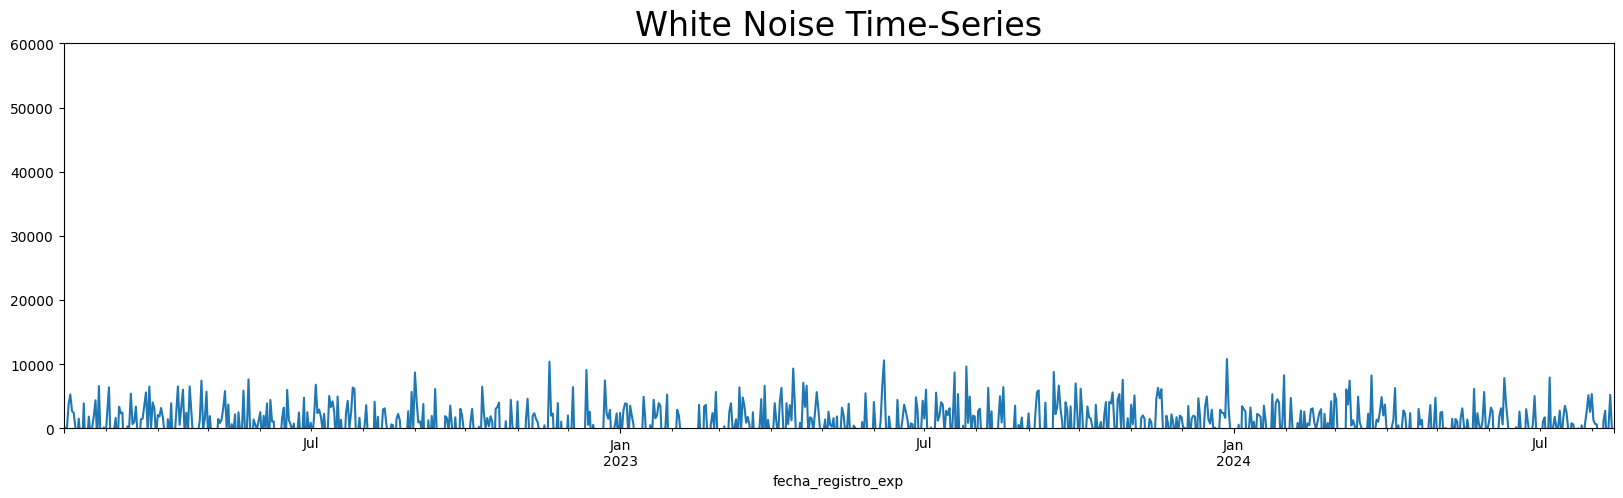

In [17]:
ts_bonosocial.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.ylim(0,60000)
plt.show()

In [10]:
ts_bonosocial.describe()

,total_exp,wn
count,923.000000,923.000000
mean,273.159263,323.582903
std,3282.079248,3300.826919
min,0.000000,-10734.475058
25%,0.000000,-1934.093242
50%,0.000000,265.473772
75%,0.000000,2464.267680
max,61802.000000,10808.019419


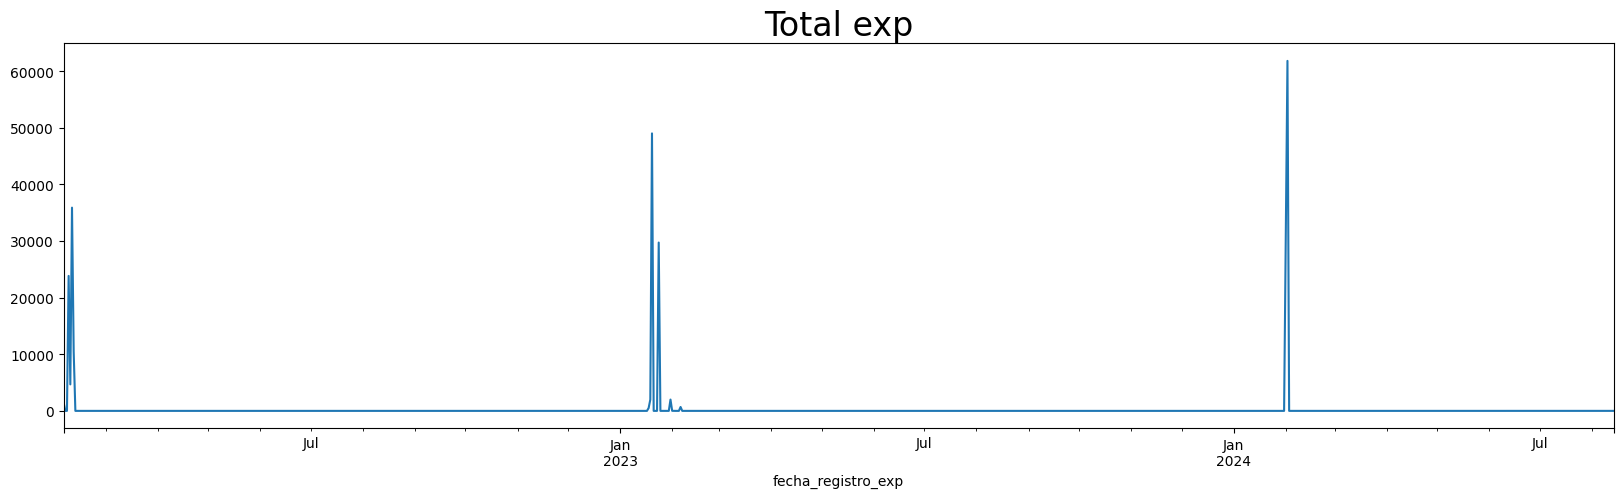

In [16]:
ts_bonosocial.total_exp.plot(figsize=(20,5))
plt.title("Total exp", size = 24)
#plt.ylim(0,350)
plt.show()

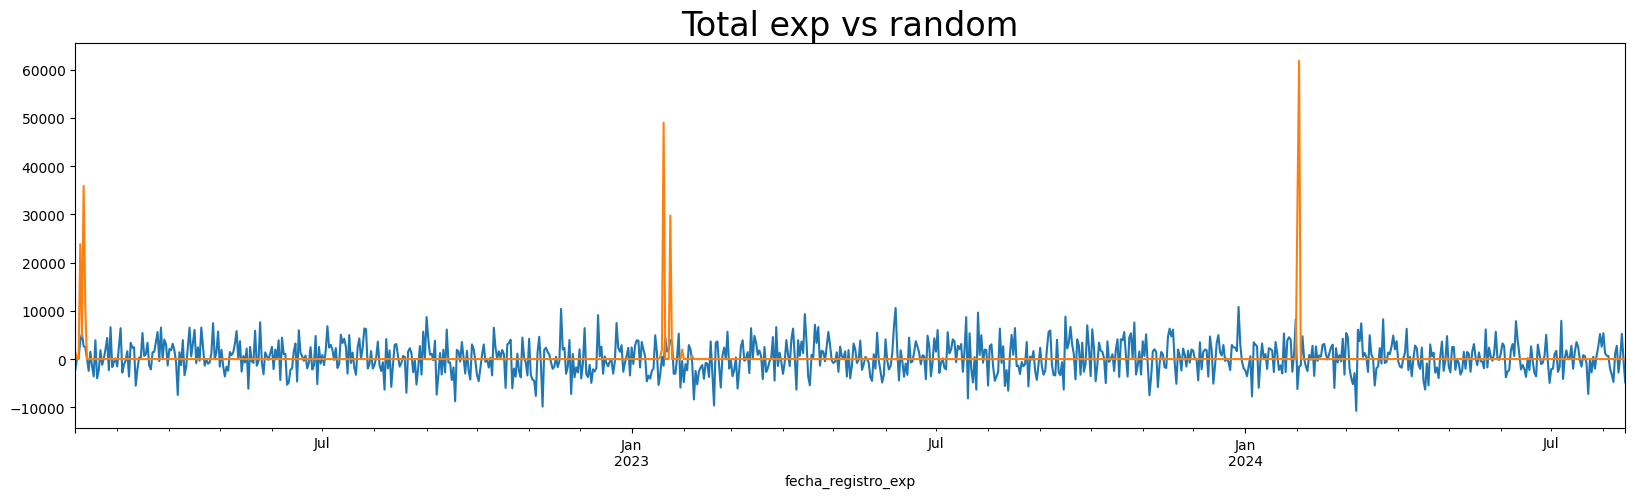

In [12]:
ts_bonosocial.wn.plot(figsize = (20,5))
ts_bonosocial.total_exp.plot()
plt.title("Total exp vs random", size = 24)
plt.show()

# Stationarity

It's particularly good at detecting trending behavior

**ADF Statistic (result[0]):**
This is the test statistic calculated from your data. More negative = stronger evidence for stationarity.Compare this with the critical values

**p-value (result[1]):**
Null hypothesis: Series is non-stationary (has a unit root) 

If p-value < significance level (typically 0.05): Reject null hypothesis Conclude series is stationary

If p-value > 0.05: Fail to reject null hypothesis Series might be non-stationary

**Critical Values (result[4]):**
Usually reported at 1%, 5%, and 10% significance levels If ADF statistic is more negative than critical value: Reject null hypothesis at that ignificance level

In [13]:
sts.adfuller(ts_bonosocial.total_exp)

(-12.209624062740449,
 1.1718781236780545e-22,
 4,
 918,
 {'1%': -3.4374934418959495,
  '5%': -2.8646935508856495,
  '10%': -2.568449150231867},
 16883.404613226612)

non stationary, 98% de probabilidad

# Seasonality

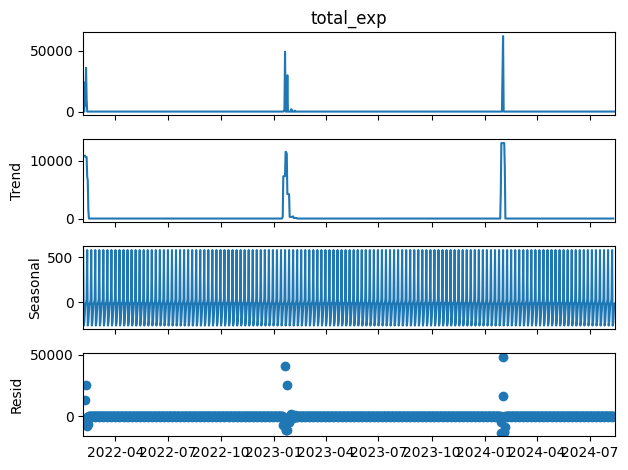

In [14]:
s_dec_additive = seasonal_decompose(ts_bonosocial.total_exp, model = "additive")
s_dec_additive.plot()
plt.show()

In [15]:
s_dec_multiplicative = seasonal_decompose(ts_bonosocial.total_exp, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [ ]:
ts_bonosocial[ts_bonosocial.total_exp == 0].count()